In [3]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [4]:
import math
import numpy as np
import scipy
from scipy.fft import fft2
import scipy.stats as stats
import matplotlib.pyplot as plt
from glob import glob
from hydra import initialize, compose

from package.analysis import ft
from package.plots import plot

plt.style.use(f'{repo_path}/package/mplstyle/science.mplstyle')

In [5]:
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, repo_dir, pickle_dir = config.machine.array_dir, config.machine.data_dir, config.machine.repo_dir, config.machine.pickle_dir
figure_dir = os.path.join(repo_dir, 'figures')

In [ ]:
# TODO check the no grid oversampling power spectra and compare to grid oversampling

In [6]:
array_dir = os.path.join(array_dir, 'sample_skypy_lens')
file_list = glob(array_dir + '/sample_skypy_lens_*.npy')

image_list = [np.load(i) for i in file_list]

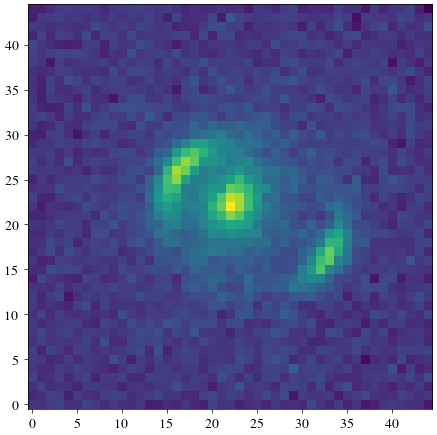

In [7]:
from scipy import fftpack
import numpy as np

image = image_list[-1]

# Take the fourier transform of the image.
f1 = fftpack.fft2(image)

# Now shift the quadrants around so that low spatial frequencies are in
# the center of the 2D fourier transformed image.
f2 = fftpack.fftshift( f1 )

# Calculate a 2D power spectrum
psd2D = np.abs( f2 )**2

# Calculate the azimuthally averaged 1D power spectrum
psd1D = ft.azimuthalAverage(psd2D)

plt.imshow( np.log10( image ))
plt.show()

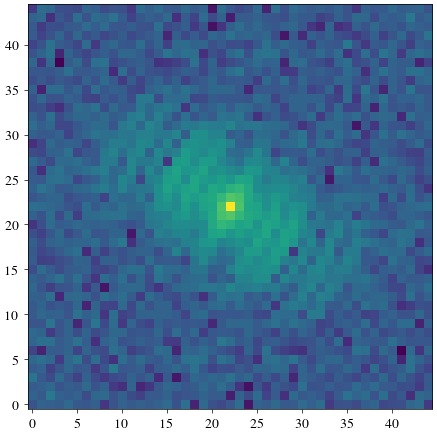

In [9]:
plt.imshow(np.log10(psd2D))

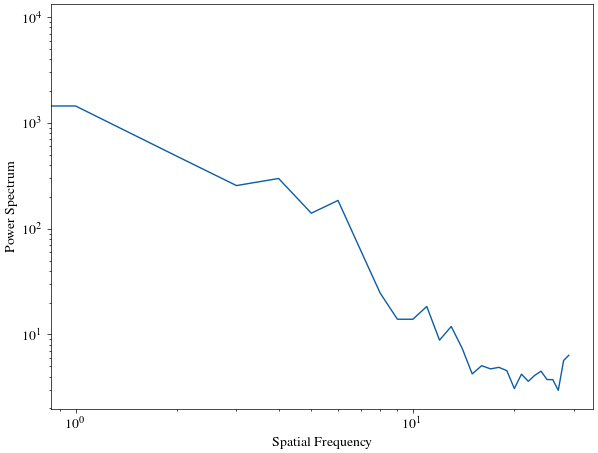

In [10]:
plt.loglog(psd1D)
plt.xlabel('Spatial Frequency')
plt.ylabel('Power Spectrum')
plt.show()

In [11]:
no_substructure = np.load(os.path.join(array_dir, 'sample_skypy_lens_no_substructure_10000.npy'))
substructure = np.load(os.path.join(array_dir, 'sample_skypy_lens_10000.npy'))

substructure_compare = [no_substructure, substructure]
title_list = ['No substructure', 'Substructure']

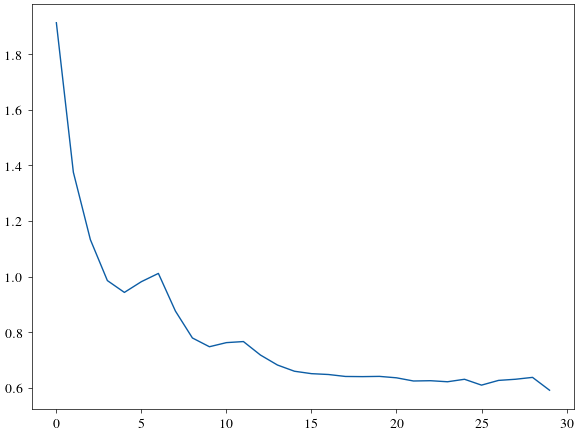

In [12]:
plt.plot(ft.azimuthalAverage(substructure))

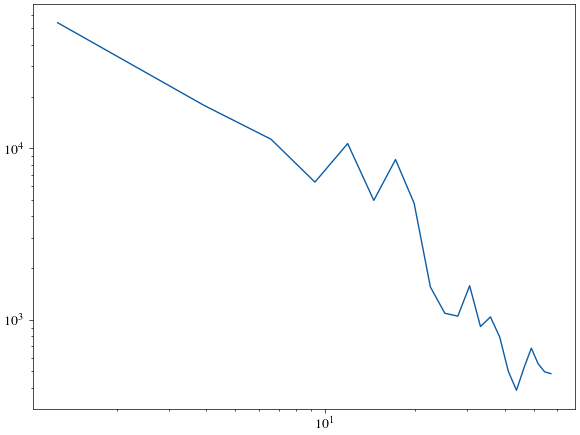

In [33]:
npix = substructure.shape[0]

fourier_image = np.fft.fftn(substructure)
fourier_amplitudes = np.abs(fourier_image)**2

kfreq = np.fft.fftfreq(npix) * npix
kfreq2D = np.meshgrid(kfreq, kfreq)
knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)

knrm = knrm.flatten()
fourier_amplitudes = fourier_amplitudes.flatten()

kbins = np.arange(0.5, npix//2+1, 1.)
kvals = 0.5 * (kbins[1:] + kbins[:-1])

k_min = (2 * np.pi) / 4.95
k_max = (2 * np.pi) / 0.11
kvals = np.linspace(k_min, k_max, 22)

Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                    statistic = "mean",
                                    bins = kbins)


Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)

plt.loglog(kvals, Abins)

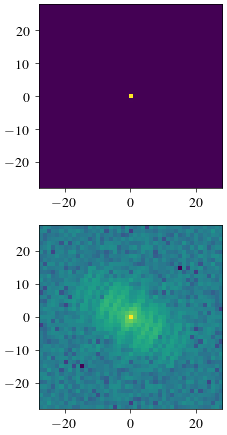

In [13]:
pix_size = 0.11
rnge = 45

data = [substructure]

ind_ps = []
for i in data:
    ft = np.fft.fft2(i)
    ps2D = np.abs(ft) ** 2
    ind_ps.append(ps2D)

A_pix = pix_size ** 2
A_box = rnge ** 2
norm = A_pix ** 2 / A_box

ind_ps_x = [norm * np.fft.fftshift(i) for i in ind_ps]
tot_ps = np.mean(ind_ps_x, axis=0)
tot_ps2 = np.log10(tot_ps)

kx = 2 * np.pi * np.fft.fftfreq(tot_ps.shape[0], d=pix_size)
kx = np.fft.fftshift(kx)
ky = 2 * np.pi * np.fft.fftfreq(tot_ps.shape[1], d=pix_size)
ky = np.fft.fftshift(ky)

fig, (ax1, ax2) = plt.subplots(2, sharey=True)
ax1.imshow(tot_ps, extent=[min(kx), max(kx), min(ky), max(ky)], interpolation='nearest')
ax2.imshow(tot_ps2, extent=[min(kx), max(kx), min(ky), max(ky)], interpolation='nearest')
plt.show()

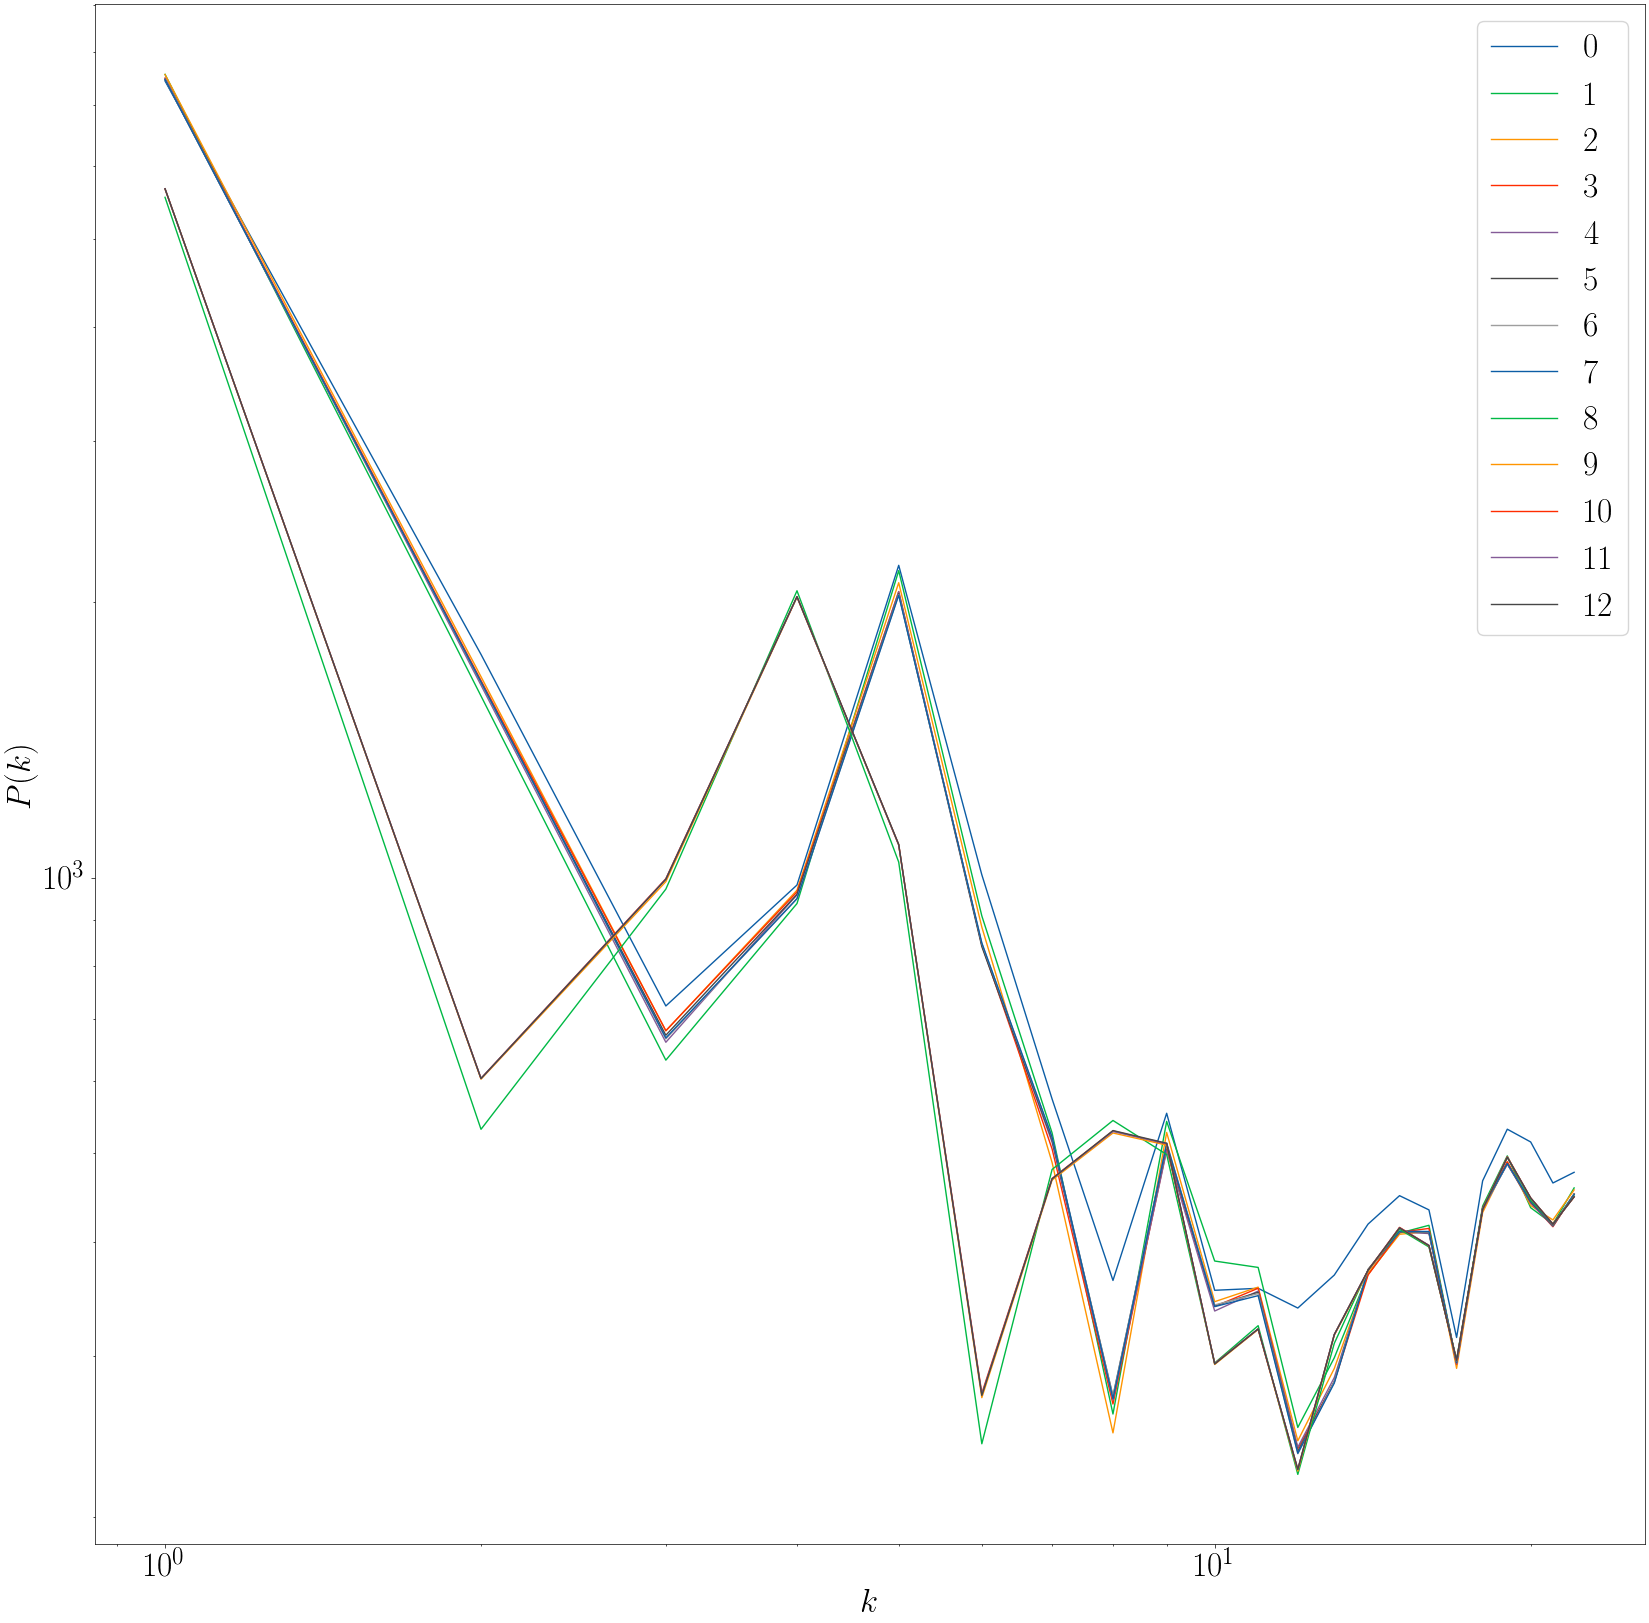

In [ ]:
f, ax = plt.subplots(figsize=(20, 20))

for i, image in enumerate(image_list):
    npix = image.shape[0]

    fourier_image = np.fft.fftn(image)
    fourier_amplitudes = np.abs(fourier_image)**2

    kfreq = np.fft.fftfreq(npix) * npix
    kfreq2D = np.meshgrid(kfreq, kfreq)
    knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)

    knrm = knrm.flatten()
    fourier_amplitudes = fourier_amplitudes.flatten()

    kbins = np.arange(0.5, npix//2+1, 1.)
    kvals = 0.5 * (kbins[1:] + kbins[:-1])
    Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                        statistic = "mean",
                                        bins = kbins)
    Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)

    data, = ax.loglog(kvals, Abins)
    ax.set_xlabel('$k$')
    ax.set_ylabel('$P(k)$')
    data.set_label(f'{i}')

ax.legend()

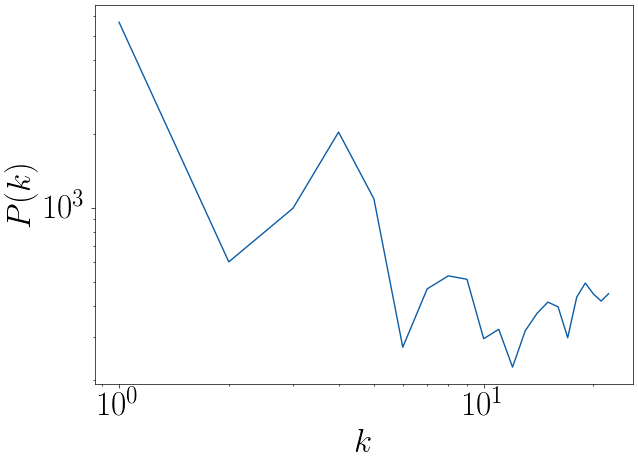

In [ ]:
image = image_list[-1]

npix = image.shape[0]

fourier_image = np.fft.fftn(image)
fourier_amplitudes = np.abs(fourier_image)**2

kfreq = np.fft.fftfreq(npix) * npix
kfreq2D = np.meshgrid(kfreq, kfreq)
knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)

knrm = knrm.flatten()
fourier_amplitudes = fourier_amplitudes.flatten()

kbins = np.arange(0.5, npix//2+1, 1.)
kvals = 0.5 * (kbins[1:] + kbins[:-1])
Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                     statistic = "mean",
                                     bins = kbins)
Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)

plt.loglog(kvals, Abins)
plt.xlabel("$k$")
plt.ylabel("$P(k)$")
plt.tight_layout()
# pl.savefig("cloud_power_spectrum.png", dpi = 300, bbox_inches = "tight")

[Source](https://stackoverflow.com/questions/54410356/plot-the-psd-of-an-image-vs-x-y-axis)

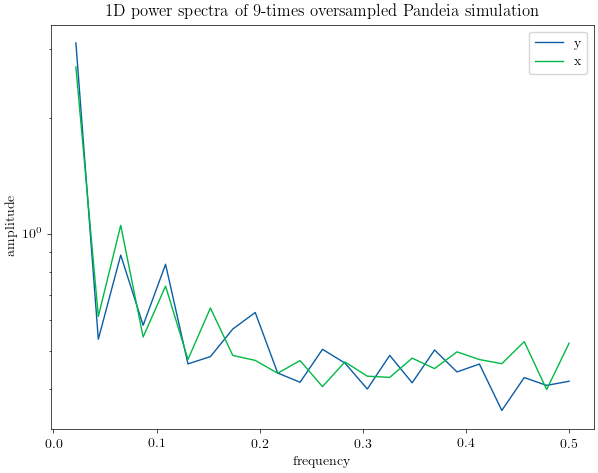

In [ ]:
# Fourier Transform along the first axis

# TODO get into the right units of inverse arcseconds

# Round up the size along this axis to an even number
n = int( math.ceil(image.shape[0] / 2.) * 2 )

# We use rfft since we are processing real values
y = np.fft.rfft(image,n, axis=0)

# Sum power along the second axis
y = y.real*y.real + y.imag*y.imag
y = y.sum(axis=1)/y.shape[1]

# Generate a list of frequencies
fy = np.fft.rfftfreq(n)

# Graph it
plt.plot(fy[1:],y[1:], label ='y')

# Fourier Transform along the second axis

# Same steps as above
n = int( math.ceil(image.shape[1] / 2.) * 2 )

x = np.fft.rfft(image,n,axis=1)

x = x.real*x.real + x.imag*x.imag
x = x.sum(axis=0)/x.shape[0]

fx = np.fft.rfftfreq(n)

plt.plot(fx[1:],x[1:], label='x')

plt.title('1D power spectra of 9-times oversampled Pandeia simulation')
plt.ylabel('amplitude')
plt.xlabel('frequency')
plt.yscale('log')
plt.legend()

plt.show()

[Source](https://bertvandenbroucke.netlify.app/2019/05/24/computing-a-power-spectrum-in-python/)

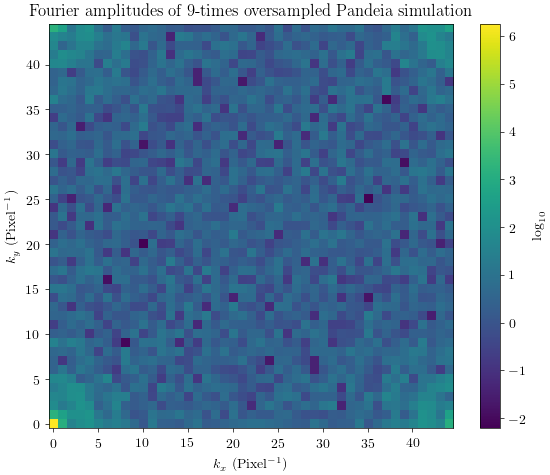

In [ ]:
npix = image.shape[0]

fourier_image = np.fft.fftn(image)
fourier_amplitudes = np.abs(fourier_image)**2

plt.imshow(np.log10(fourier_amplitudes))
plt.title('Fourier amplitudes of 9-times oversampled Pandeia simulation')
plt.xlabel('$k_x$ (Pixel$^{-1}$)')
plt.ylabel('$k_y$ (Pixel$^{-1}$)')
cbar = plt.colorbar()
cbar.set_label('$\log_{10}$')
plt.show()

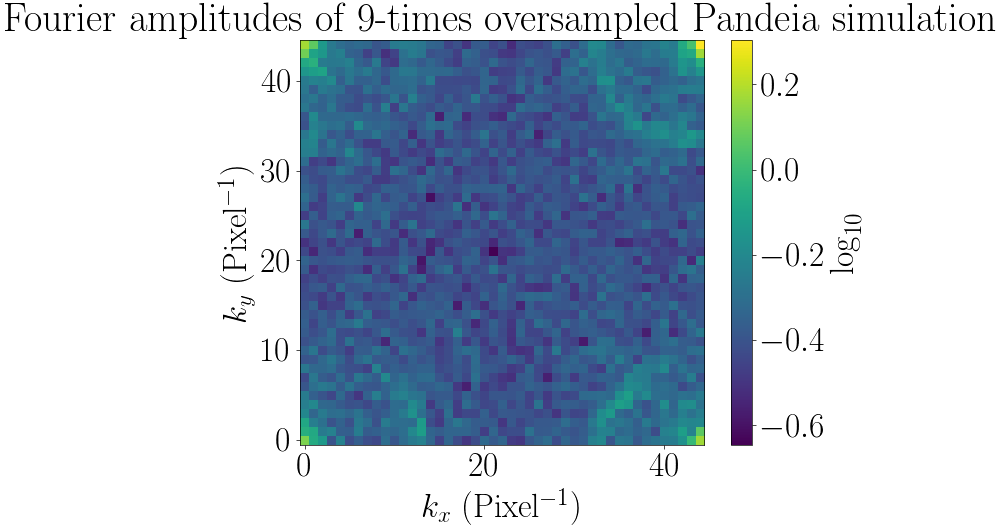

In [ ]:
npix = image.shape[0]

fourier_image = scipy.fftpack.fftshift(image)
fourier_amplitudes = np.abs(fourier_image)**2

plt.imshow(np.log10(fourier_amplitudes))
plt.title('Fourier amplitudes of 9-times oversampled Pandeia simulation')
plt.xlabel('$k_x$ (Pixel$^{-1}$)')
plt.ylabel('$k_y$ (Pixel$^{-1}$)')
cbar = plt.colorbar()
cbar.set_label('$\log_{10}$')
plt.show()

In [ ]:
kfreq = np.fft.fftfreq(npix) * npix
kfreq2D = np.meshgrid(kfreq, kfreq)
knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)

In [ ]:
knrm = knrm.flatten()
fourier_amplitudes_flat = fourier_amplitudes.flatten()

In [ ]:
kbins = np.arange(0.5, npix//2+1, 1.)
kvals = 0.5 * (kbins[1:] + kbins[:-1])
Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes_flat,
                                     statistic = "mean",
                                     bins = kbins)
Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)

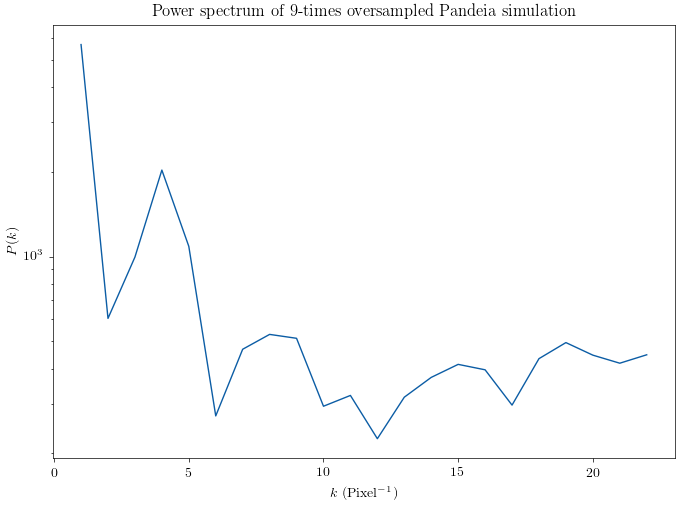

In [ ]:
plt.plot(kvals, Abins)
plt.title('Power spectrum of 9-times oversampled Pandeia simulation')
plt.xlabel("$k$ (Pixel$^{-1})$")
plt.ylabel("$P(k)$")
# plt.xscale('log')
plt.yscale('log')
plt.tight_layout()

plt.show()

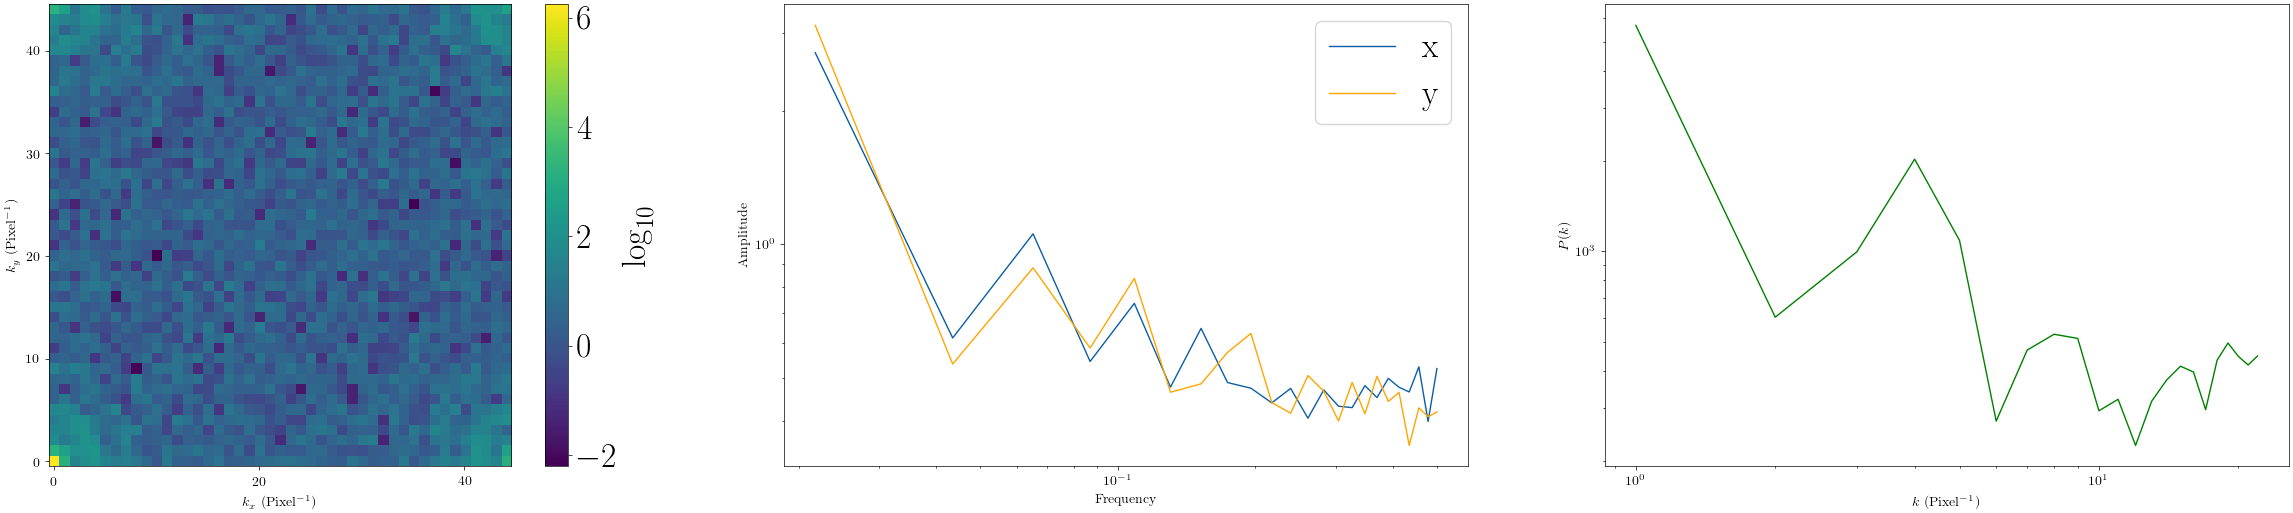

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,6))

import matplotlib
fontsize = 24
matplotlib.rcParams.update({'font.size': fontsize})

ax0 = ax[0].imshow(np.log10(fourier_amplitudes))
ax1 = ax[1].plot(fx[1:],x[1:], label='x')
ax[1].plot(fy[1:],y[1:], label='y', color='orange')
ax2 = ax[2].plot(kvals, Abins, color='g')

# ax[0].set_title('Fourier amplitudes of 9-times oversampled Pandeia simulation')
# ax[1].set_title('1D power spectra of 9-times oversampled Pandeia simulation')
# ax[2].set_title('Power spectrum of 9-times oversampled Pandeia simulation')

cbar = plt.colorbar(ax0, ax=ax[0])
cbar.set_label('$\log_{10}$')
ax[0].set_xlabel('$k_x$ (Pixel$^{-1}$)')
ax[0].set_ylabel('$k_y$ (Pixel$^{-1}$)')

ax[1].set_ylabel('Amplitude')
ax[1].set_xlabel('Frequency')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].legend()

ax[2].set_xlabel("$k$ (Pixel$^{-1})$")
ax[2].set_ylabel("$P(k)$")
ax[2].set_xscale('log')
ax[2].set_yscale('log')

plt.savefig(os.path.join(figure_dir, 'power_spectrum.png'))
plt.show()